# Santander Keggle Competition -- predict dissatisfacted customers 
Which customers are happy customers? From frontline support teams to C-suites, customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving. Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.   
https://www.kaggle.com/c/santander-customer-satisfaction


### Load library
load libraries to be used in this project

In [1]:
# load libraries
import pandas
import numpy as np 
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn import cross_validation as cv
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model 
from sklearn import naive_bayes 
from sklearn.svm import SVC
from sklearn import preprocessing
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

# Tell iPython to include plots inline in the notebook
%matplotlib inline


## 1. Pre-process
The code below will load the training and testing dat; conduct a data aduting; remove constant and dupicated colums

### 1.1 Load Data

In [2]:
# load data
df_train = pandas.read_csv("train.csv")
df_test  = pandas.read_csv("test.csv")   
print("Data loaded")


Data loaded


### 1.2 Data Summary
conduct a briedf data auditing

In [3]:
# data summary 
# training set
print ("Training set:")
n_data  = len(df_train)
# exclude first colum ID and last column label (substract 2)
n_features = df_train.shape[1]-2 
# number of satisfied customers
n_sat = len(df_train[df_train['TARGET'] == 0]) 
# number of dissatisfied customers
n_unsat = len(df_train[df_train['TARGET'] == 1]) 
sat_rate = 100*n_unsat/n_sat
print ("Total number of data: {}".format(n_data))
print ("Number of features: {}".format(n_features))
print ("Number of satisfied customer: {}".format(n_sat))
print ("Number of dissatisfied customer: {}".format(n_unsat))
print ("% of dissatisfied customer: {:.2f}%".format(sat_rate))

# testing set
# label is not given to the testing set
print ("\nTesting set:")
n_data  = len(df_test)
# exclude first colum ID (substract 1)
n_features = df_test.shape[1]-1 
print ("Total number of data: {}".format(n_data))
print ("Number of features: {}".format(n_features))


Training set:
Total number of data: 76020
Number of features: 369
Number of satisfied customer: 73012
Number of dissatisfied customer: 3008
% of dissatisfied customer: 4.00%

Testing set:
Total number of data: 75818
Number of features: 369


### 1.3 Remove Constant Columns

In [4]:
# remove constant columns
colsToRemove = []
df0= df_train # orignial dataset
for col in df_train.columns:
    # column have 0 standard deviation
    if df_train[col].std() == 0: 
        colsToRemove.append(col)
# remove constant columns in the training set
df_train.drop(colsToRemove, axis=1, inplace=True) 
# remove constant columns in the test set
df_test.drop(colsToRemove, axis=1, inplace=True) 
print("# removed constant columns: {}".format(len(colsToRemove)))  
#print("Train set size: {}".format(df_train.shape))
#print("Test set size: {}".format(df_test.shape))


# removed constant columns: 34


In [5]:
print(colsToRemove) #printconstant columns

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


### 1.4 Remove Duplicate Columns

In [6]:
# remove duplicate columns
colsToRemove = [] # columns to remove
colsScaned = [] # columns scaned
dupList = {} # a dictionary of dupicate columns with distinct values
# the keys are the first column of the dupicated columns
# the entries are columns which has the same value as the key 
columns = df_train.columns
for i in range(len(columns)-1):
    # search through every column
    v = df_train[columns[i]].values
    dupCols = [] # dumpicated columns
    for j in range(i+1,len(columns)):
    # compare if the two column are equal
        if np.array_equal(v,df_train[columns[j]].values):  
        # if yes add to the columns to be removed
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
            # only add new entry if the column haven't be scaned before
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j]) # add the column as scaned
                dupList[columns[i]] = dupCols # update the key in the dictionary

# print the dupicated columns as a dictionary
# the keys are distinct dupicated columns
# the entries are columns which has the same value as the key 
print(dupList)
print("# duplicated columns with distinct values: {}".format(len(dupList)))  

df_train.drop(colsToRemove, axis=1, inplace=True) 
# remove duplicate columns in the training set
df_test.drop(colsToRemove, axis=1, inplace=True) 
# remove duplicate columns in the test set
print("# removed duplicated columns: {}".format(len(colsToRemove)))  
#print("Train set size: {}".format(df_train.shape))
#print("Test set size: {}".format(df_test.shape))

{'delta_imp_reemb_var33_1y3': ['delta_num_reemb_var33_1y3'], 'ind_var18_0': ['ind_var18'], 'delta_imp_reemb_var13_1y3': ['delta_num_reemb_var13_1y3'], 'ind_var26_0': ['ind_var26'], 'ind_var25_0': ['ind_var25'], 'num_var6_0': ['num_var29_0'], 'num_var26_0': ['num_var26'], 'ind_var40': ['ind_var39'], 'ind_var37_0': ['ind_var37'], 'num_var18_0': ['num_var18'], 'delta_imp_trasp_var33_in_1y3': ['delta_num_trasp_var33_in_1y3'], 'saldo_var13_medio': ['saldo_medio_var13_medio_ult1'], 'num_var40': ['num_var39'], 'num_var34_0': ['num_var34'], 'num_var32_0': ['num_var32'], 'ind_var13_medio_0': ['ind_var13_medio'], 'num_var6': ['num_var29'], 'num_var13_medio_0': ['num_var13_medio'], 'ind_var32_0': ['ind_var32'], 'delta_imp_reemb_var17_1y3': ['delta_num_reemb_var17_1y3'], 'delta_imp_trasp_var17_in_1y3': ['delta_num_trasp_var17_in_1y3'], 'saldo_var6': ['saldo_var29'], 'ind_var34_0': ['ind_var34'], 'num_var37_0': ['num_var37'], 'num_var25_0': ['num_var25'], 'ind_var6_0': ['ind_var29_0'], 'delta_imp_t

In [7]:
print(colsToRemove) # print Duplicate columns

['ind_var29_0', 'ind_var29', 'ind_var13_medio', 'ind_var18', 'ind_var26', 'ind_var25', 'ind_var32', 'ind_var34', 'ind_var37', 'ind_var39', 'num_var29_0', 'num_var29', 'num_var13_medio', 'num_var18', 'num_var26', 'num_var25', 'num_var32', 'num_var34', 'num_var37', 'num_var39', 'saldo_var29', 'saldo_medio_var13_medio_ult1', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3']


### 1.5 Make Train and Test Set
Construct the training and test set from the original data set

In [8]:
# make train and test set
id_test = df_test['ID'] # get the id of the test set data
y_train = df_train['TARGET'] # get the label of the training set
X_train = df_train.drop(['ID','TARGET'], axis=1) 
# remove the columns of ID and Label in training set
X_test = df_test.drop(['ID'], axis=1) 
# remove the columns of ID  in test set

print("Train set size: {}".format(X_train.shape))
print("Test set size: {}".format(X_test.shape))

Train set size: (76020, 306)
Test set size: (75818, 306)


## 2 Exploratory Data Analysis
The code below will visualzie by reducing it in 2D

### 2.1 PCA
conduct Principal Component Analysis (PCA)

In [9]:
# rescale the data for PCA
scaler = preprocessing.MinMaxScaler() # max min scaling
X_train_normalized = scaler.fit_transform(X_train)
print("Train set size: {}".format(X_train_normalized.shape))

Train set size: (76020L, 306L)


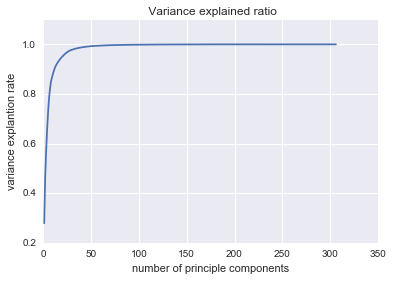

In [10]:
# PCA
# n_components equal # feature
pca = PCA(n_components=X_train_normalized.shape[1]) 
pca.fit(X_train_normalized)
np.set_printoptions(precision=2, suppress=True) # set printing format
# plot variance explained ratio
plt.plot(range(1,307),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principle components')
plt.ylabel('variance explantion rate')
plt.title(" Variance explained ratio")
#print(np.cumsum(pca.explained_variance_ratio_))

# Print the components and the amount of variance in the data
# contained in each dimension
# print ("Principle components:")
# print (pca.components_)

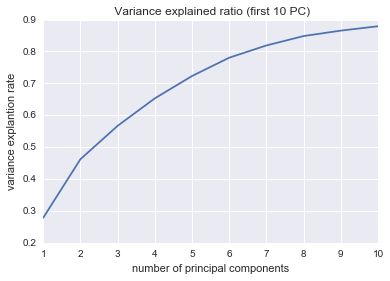

In [11]:
# Plot variance explantion rate of first 10 PCs
plt.plot(range(1,11),np.cumsum(pca.explained_variance_ratio_[:10]))
plt.xlabel('number of principal components')
plt.ylabel('variance explantion rate')
plt.title(" Variance explained ratio (first 10 PC)")

In [12]:
# Project on 2 PCs
pca_2d = PCA(n_components = 2) # 2 principle components
pca_2d.fit(X_train_normalized)
# reduce the dataset to 2 pcs
reduced_data = pca_2d.fit_transform(X_train_normalized) 
#np.set_printoptions(precision=0, suppress=True)
#print (reduced_data[:10])  # print upto 10 elements

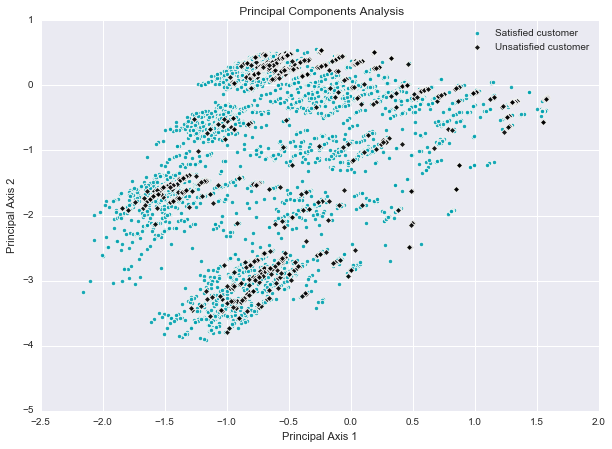

In [13]:
# Visualization PCA in 2D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
colors = [(0.0, 0.63, 0.69), 'black']
classes = [0,1]
labels = ["Satisfied customer", "Unsatisfied customer"]
markers = ["o", "D"]
for class_ix, marker, color, label in zip(classes, markers, colors, labels):
    ax.scatter(reduced_data[np.where(y_train == class_ix), 0],
               reduced_data[np.where(y_train == class_ix), 1],
               marker=marker, color=color, edgecolor='whitesmoke',
               linewidth='1', alpha=0.9, label=label)
    ax.legend(loc='best')
plt.title(" Principal Components Analysis")
plt.xlabel("Principal Axis 1")
plt.ylabel("Principal Axis 2")
plt.show()

## 3. Model selection
The code below will compare 7 different algorithms using the AUROC score and 3-fold cross-validation 
The classifiers are in their default setting and not fine-tuned.

In [14]:
# Define scoring function (performance metrics)
def score_model(clf):
    print ("\nClassifier: {}...".format(clf.__class__.__name__))
    start = time.time()
    # use 3-fold CV
    scores = cross_validation.cross_val_score(clf, X_train, y_train,
                                              scoring='roc_auc', cv=3) 
    end = time.time()
    print ("time (secs): {:.3f}".format(end - start))
    print ("roc_auc: {:.3f}".format(scores.mean()))
    return scores.mean()

In [15]:
# Compare different algrithem
scores = {}
# Decision Tree
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 
# naive bayes
scores['gaussian'] = score_model(naive_bayes.GaussianNB())
# logistic regression
scores['logistic_regression'] = score_model(linear_model.LogisticRegression()) 

# ensemble methors
# AdaBoost
scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier()) 
# Random Forest
scores['random_forest'] = score_model(ensemble.RandomForestClassifier()) 
# bagging
scores['bagging'] = score_model(ensemble.BaggingClassifier()) 
# gradient boosting
scores['gradient_boosting'] = score_model(ensemble.GradientBoostingClassifier()) 


Classifier: DecisionTreeClassifier...
time (secs): 7.438
roc_auc: 0.572

Classifier: GaussianNB...
time (secs): 2.192
roc_auc: 0.513

Classifier: LogisticRegression...
time (secs): 22.512
roc_auc: 0.604

Classifier: AdaBoostClassifier...
time (secs): 21.312
roc_auc: 0.826

Classifier: RandomForestClassifier...
time (secs): 4.377
roc_auc: 0.676

Classifier: BaggingClassifier...
time (secs): 42.301
roc_auc: 0.696

Classifier: GradientBoostingClassifier...
time (secs): 214.484
roc_auc: 0.833


## 4  Feature Selection
The data importance is selected by the Gradient Boosting classifier

### 4.1 Feature importance
rank the feature importance according the the classifer

In [16]:
# Use GradientBoosting to find feature importance
clf = ensemble.GradientBoostingClassifier(random_state = 42) # define classifier
clf.fit(X_train, y_train) # fit trainig data
print(clf)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)


In [17]:
# list feature importance
importances = clf.feature_importances_ 
# get feature importance from the classifier
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
## the list is very long, so comment it out
#colsToSelect = []
#for f in range(X_train.shape[1]):
#    print("%d. feature %d %s (%f)" % (f + 1, indices[f], 
#                                      X_train.columns[indices[f]], 
#                                      importances[indices[f]]))


Feature ranking:


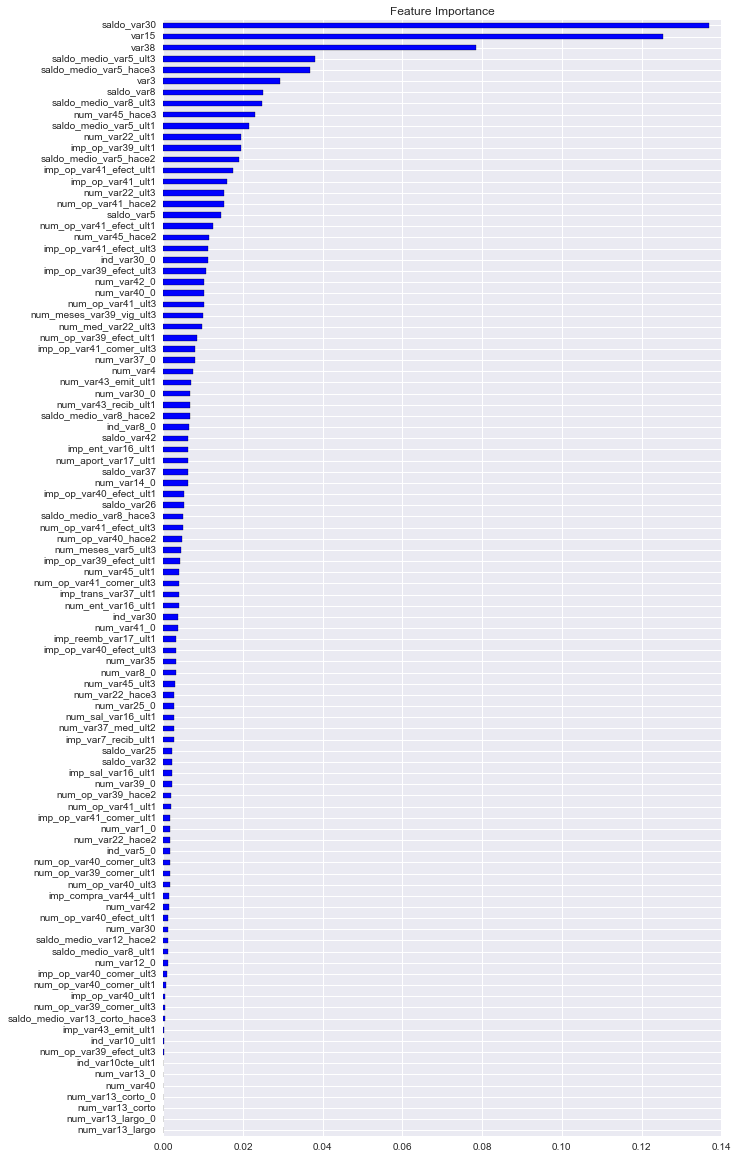

In [18]:
# visualizate the most important 100 features
feat_imp = pandas.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(inplace=True,ascending =False )
# plot the importance of the first 100 features
ax =feat_imp.head(100).plot(kind='barh', figsize=(10,20), align='center',
                           title='Feature Importance')
ax.invert_yaxis()

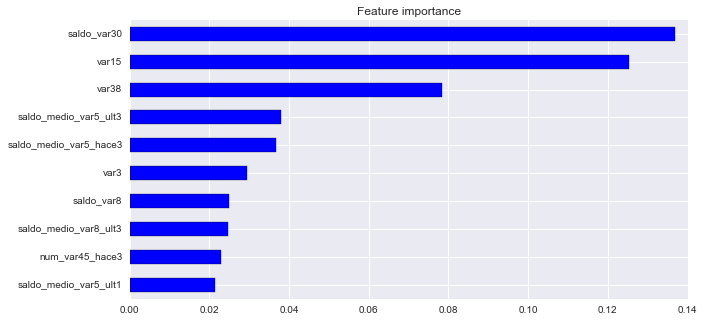

In [19]:
# visualizate the most important 10 features
feat_imp = pandas.Series(clf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(inplace=True,ascending =False )
#print(feat_imp.head(10))
ax =feat_imp.head(10).plot(kind='barh', figsize=(10,5), align='center',
                           title='Feature importance')
ax.invert_yaxis()

### 4.2 Feature Selection
Reduce the number of # features to accelerate the algorithm

In [20]:
# select the first 92 most important features.
colsToSelect = []
for f in range(0,92):
    colsToSelect.append(X_train.columns[indices[f]])
print ("number of feature selected: {:.0f}".format(len(colsToSelect)))

number of feature selected: 92


In [21]:
# select feature in new data set
y_train2 = df_train['TARGET'] # data label
X_train2 = df_train[colsToSelect] # new training set
X_test2 = df_test[colsToSelect] # new test set
print("Train set size: {}".format(X_train2.shape))
print("Test set size: {}".format(X_test2.shape))

Train set size: (76020, 92)
Test set size: (75818, 92)


### 4.2 Data Visualizaton
The code below will visualize  first 5 most important features through:
* Pair plot
* Correlation plot 

In [22]:
# select the first 5 most important features to visualize
cols2see = []
for f in range(0,5):
    cols2see.append(X_train.columns[indices[f]])
cols2see.append('TARGET') # make another one with 'TARGET'
data2see = df_train[cols2see]

In [23]:
# print the 5 variable to investigate
print(cols2see)

['saldo_var30', 'var15', 'var38', 'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'TARGET']


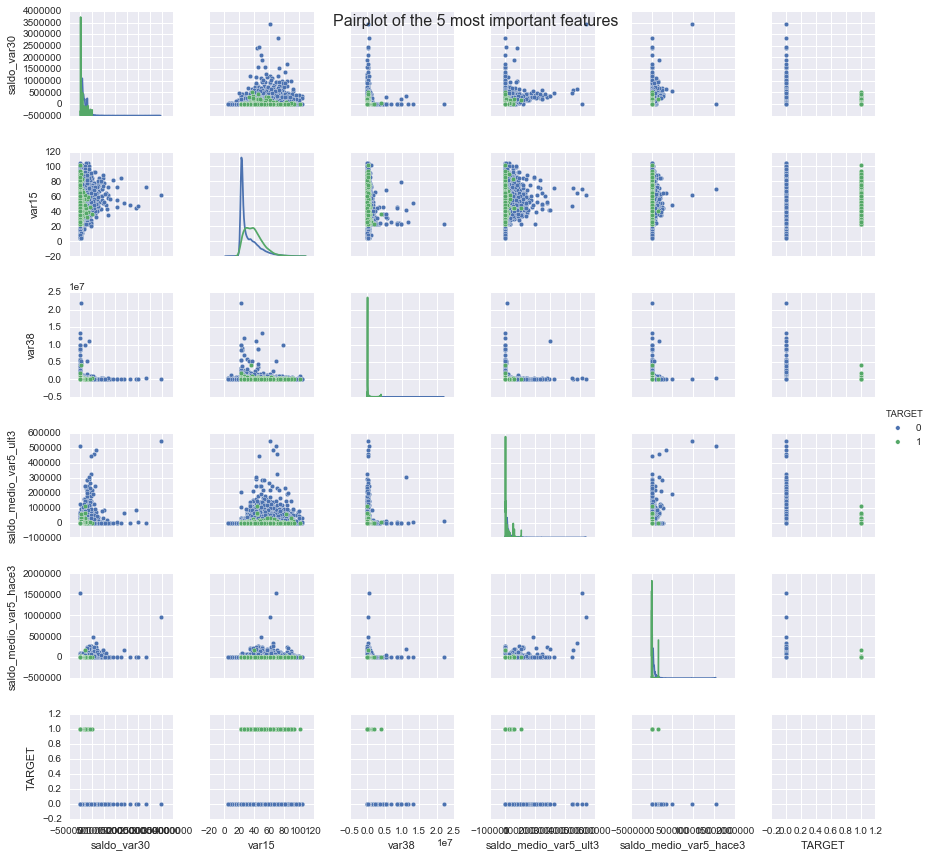

In [24]:
# pair plot the 5 variables
g =sns.pairplot(df_train[['saldo_var30', 'var15', 'var38',
                          'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3',
                          'TARGET']],
             hue="TARGET", size=2, diag_kind="kde")
g.fig.suptitle('Pairplot of the 5 most important features',fontsize=16)

C:\Users\Dalaska\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Dalaska\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


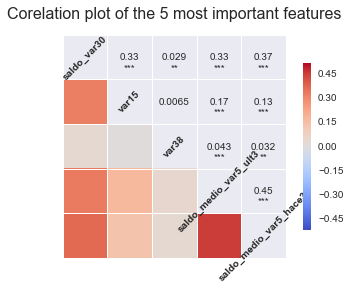

In [25]:
# Plot the correlation of the 5 most important features
# select the first 5 most important features to visualize
cols2see = []
for f in range(0,5):
    cols2see.append(X_train.columns[indices[f]])
data2see = df_train[cols2see]
ax = plt.axes()
sns.corrplot(data2see,ax = ax)
ax.set_title('Corelation plot of the 5 most important features',fontsize=16)
plt.show()

## 5. Parameter Tuning
The process of the parameter tuning is described as follows:
* Choose a relatively high ‘learning rate’.
* Determine the optimum ‘max_features’.
* Determine the optimum ‘n_estimators’.
* Tune tree-specific parameters including ‘min_samples_leaf’ ‘max_depth’.
* Tune the ‘subsample’ parameters.
* Fine tuning the ‘learning rate’.

### 5.1  Tuning max_features 
max_features determines the number of features to be considered while searching for the best split. The higher values can lead to over-fitting.

Tuning max_features
max_features: 10.000
Running time (secs): 67.376
roc_auc: 0.83343
max_features: 15.000
Running time (secs): 70.632
roc_auc: 0.83607
max_features: 18.000
Running time (secs): 72.716
roc_auc: 0.83532
max_features: 20.000
Running time (secs): 73.194
roc_auc: 0.83655
max_features: 30.000
Running time (secs): 77.630
roc_auc: 0.83585


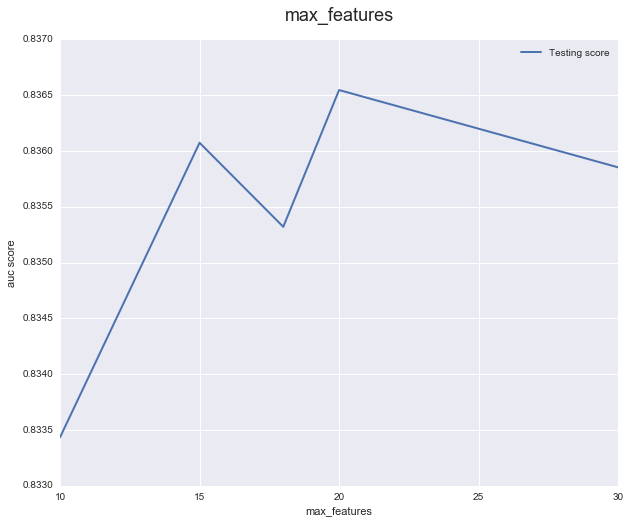

In [26]:
# Tuning max_features 
print ("Tuning max_features")
# search for the optimal value
max_features = [10,15,18,20,30]
test_score = np.zeros(len(max_features))
# Create different models 
for i, s in enumerate(max_features):
    start = time.time()
    print ("max_features: {:.3f}".format(s))
    # Setup a classifer
    clf = ensemble.GradientBoostingClassifier(max_features = s, 
                                              learning_rate=0.1,
                                              random_state=42)                 
    # use 4-fold CV
    scores = cross_validation.cross_val_score(clf, X_train2, y_train2, scoring='roc_auc', cv=4)
    test_score[i] = scores.mean() # report the mean      
    end = time.time()
    print ("Running time (secs): {:.3f}".format(end - start))    
    print ("roc_auc: {:.5f}".format(scores.mean())) 

# Visual aesthetics
plt.figure(figsize=(10,8))
plt.plot(max_features, test_score, lw = 2, label = 'Testing score')
plt.legend()
plt.title('max_features', fontsize=18, y=1.03)
plt.xlabel('max_features')
plt.ylabel('auc score')

### 5.1  Tuning n_estimators
Parameter n_estimators determines the number of sequential trees to be modeled, A relatively large learning_rate is selected (0.1) to reduce the training time.

Tuning n_estimators
n_estimators: 50.000
Running time (secs): 37.058
roc_auc: 0.83229
n_estimators: 100.000
Running time (secs): 72.727
roc_auc: 0.83532
n_estimators: 130.000
Running time (secs): 93.591
roc_auc: 0.83577
n_estimators: 150.000
Running time (secs): 108.161
roc_auc: 0.83584
n_estimators: 170.000
Running time (secs): 122.358
roc_auc: 0.83612
n_estimators: 200.000
Running time (secs): 142.666
roc_auc: 0.83583


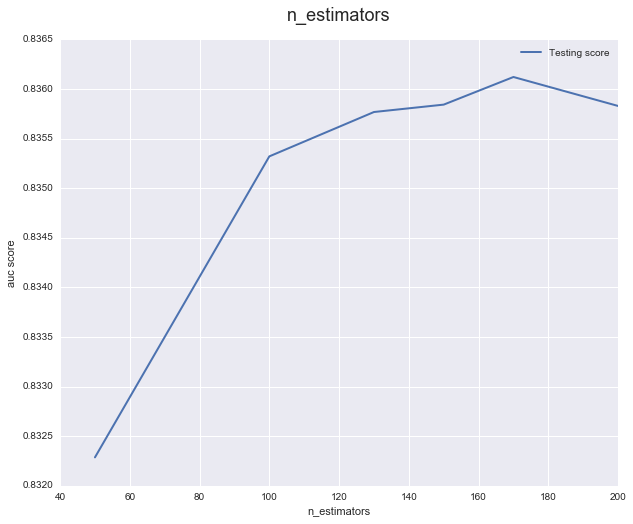

In [27]:
# Tunning n_estimators
print ("Tuning n_estimators")
# search for the optimal value
n_estimators = [50,100,130,150,170,200]
test_score = np.zeros(len(n_estimators))
# Create different models
for i, s in enumerate(n_estimators):
    start = time.time()
    print ("n_estimators: {:.3f}".format(s))
    # setup a classifer
    clf = ensemble.GradientBoostingClassifier(n_estimators = s, 
                                              learning_rate= 0.1,
                                              max_features = 18,
                                              random_state=42)                 
    # use 4-fold CV
    scores = cross_validation.cross_val_score(clf, X_train2, y_train2, scoring='roc_auc', cv=4)
    test_score[i] = scores.mean()  # report the mean       
    end = time.time()
    print ("Running time (secs): {:.3f}".format(end - start))    
    print ("roc_auc: {:.5f}".format(scores.mean())) 

# Visual aesthetics
plt.figure(figsize=(10,8))
plt.plot(n_estimators, test_score, lw = 2, label = 'Testing score')
plt.legend()
plt.title('n_estimators', fontsize=18, y=1.03)
plt.xlabel('n_estimators')
plt.ylabel('auc score')

### 5.2 Tree Parameters (max_depth, min_samples_leaf)
The next step is to tune the tree-specific parameters. Two of the most important parameters are max_depth, min_samples_leaf, and min_samples_split
* max_depth determines the maximum depth of a tree. The model with higher depth will tend to over-fitting because higher depth will allow the model to learn very specific to a particular sample.
* min_samples_leaf defines the minimum samples required in a terminal node. Higher values prevent a model from over-fitting the data.
* min_samples_split defines the minimum number of samples required in a node to be considered for splitting. Similar as min_samples_leaf, the higher values prevent a model from over-fitting the data. To reducing the searching space, we chose the number of min_samples_split to be 2 times the number of min_samples_leaf.

Tuning tree parameters: max_depth,min_samples_leaf
max_depth: 2.000
min_samples_leaf: 1.000
Running time (secs): 100.709
roc_auc: 0.83483
max_depth: 2.000
min_samples_leaf: 3.000
Running time (secs): 100.433
roc_auc: 0.83523
max_depth: 2.000
min_samples_leaf: 4.000
Running time (secs): 101.046
roc_auc: 0.83509
max_depth: 2.000
min_samples_leaf: 5.000
Running time (secs): 100.867
roc_auc: 0.83560
max_depth: 2.000
min_samples_leaf: 6.000
Running time (secs): 100.597
roc_auc: 0.83541
max_depth: 3.000
min_samples_leaf: 1.000
Running time (secs): 106.982
roc_auc: 0.83584
max_depth: 3.000
min_samples_leaf: 3.000
Running time (secs): 106.833
roc_auc: 0.83638
max_depth: 3.000
min_samples_leaf: 4.000
Running time (secs): 106.799
roc_auc: 0.83661
max_depth: 3.000
min_samples_leaf: 5.000
Running time (secs): 106.718
roc_auc: 0.83769
max_depth: 3.000
min_samples_leaf: 6.000
Running time (secs): 107.142
roc_auc: 0.83700
max_depth: 4.000
min_samples_leaf: 1.000
Running time (secs): 115.356
roc_auc: 

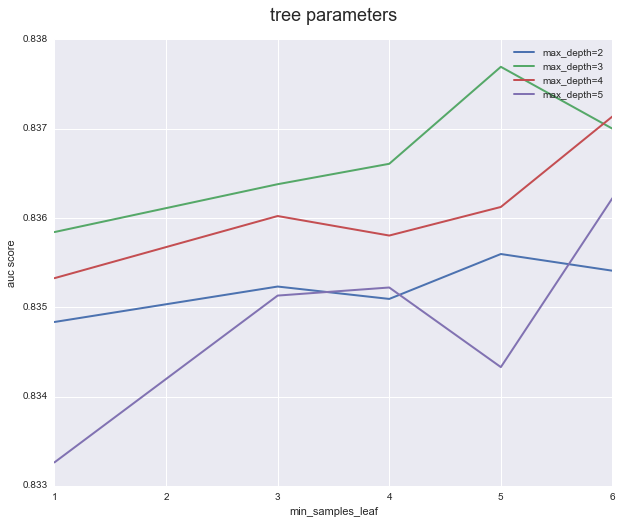

In [28]:
# Tunning Tree Parameters (max_depth, min_samples_leaf)
print ("Tuning tree parameters: max_depth,min_samples_leaf")
# search for the optimal value
min_samples_leaf= [1,3,4,5,6]
max_depth = [2,3,4,5]
# inicializing
test_score = np.zeros([len(max_depth),len(min_samples_leaf)]) 
# Create different models
for i, s in enumerate(max_depth):
    for j, t in enumerate(min_samples_leaf):
        start = time.time()
        print ("max_depth: {:.3f}".format(s))
        print ("min_samples_leaf: {:.3f}".format(t))
        # Setup a classifer
        clf = ensemble.GradientBoostingClassifier(n_estimators = 150,
                                                  max_features = 18,
                                                  learning_rate=0.1,
                                                  min_samples_leaf = t, 
                                                  min_samples_split=2*t,
                                                  max_depth = s,
                                                  random_state=42)        
        # use 4-fold CV
        scores = cross_validation.cross_val_score(clf, X_train2, y_train2, 
                                                  scoring='roc_auc', cv=4)
        test_score[i][j] = scores.mean() # report the mean          
        end = time.time()
        print ("Running time (secs): {:.3f}".format(end - start))    
        print ("roc_auc: {:.5f}".format(scores.mean())) 

# Visual aesthetics
plt.figure(figsize=(10,8))
for i in range (len(max_depth)):
    plt.plot(min_samples_leaf, test_score[i], lw = 2, 
             label = 'max_depth='+str(i+2))
plt.legend()
plt.title('tree parameters', fontsize=18, y=1.03)
plt.xlabel('min_samples_leaf')
plt.ylabel('auc score')

### 5.3 Tuning  Subsample
Subsample controls the fraction of observations to be selected for each tree. The selection is done by random sampling. The values slightly less than 1 make the model more robust.

Tuning subsample
subsample: 0.700
Runinng time (secs): 106.038
roc_auc: 0.83563
subsample: 0.800
Runinng time (secs): 105.813
roc_auc: 0.83719
subsample: 0.900
Runinng time (secs): 105.088
roc_auc: 0.83749
subsample: 0.950
Runinng time (secs): 104.564
roc_auc: 0.83668
subsample: 0.980
Runinng time (secs): 104.746
roc_auc: 0.83744


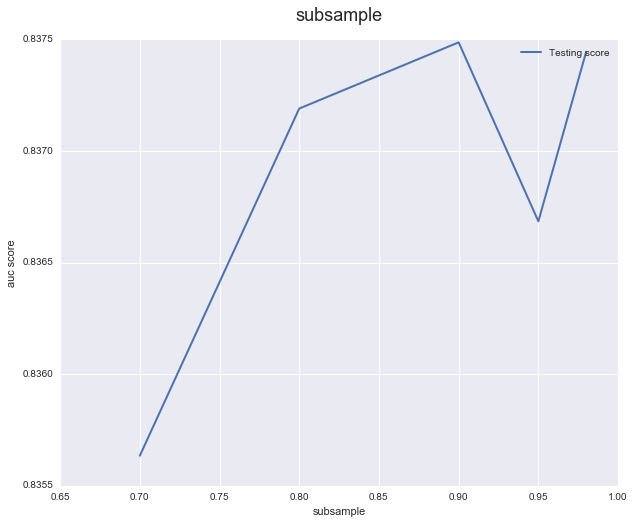

In [29]:
# Tuning Subsample
print ("Tuning subsample")
# search for the optimal value
subsample = [0.7,0.8,0.9,0.95,0.98]
test_score = np.zeros(len(subsample))
# Create different models 
for i, s in enumerate(subsample):
    start = time.time()
    print ("subsample: {:.3f}".format(s))
    # Setup a classifer
    clf = ensemble.GradientBoostingClassifier(subsample = s,
                                              n_estimators = 150,
                                              max_features = 18,
                                              max_depth = 3,
                                              min_samples_leaf = 5, 
                                              min_samples_split=10,
                                              learning_rate=0.1,
                                              random_state=42)                 

    # use 4-fold CV
    scores = cross_validation.cross_val_score(clf, X_train2, y_train2,
                                              scoring='roc_auc', cv=4)
    test_score[i] = scores.mean() # report the mean          
    end = time.time()
    print ("Runinng time (secs): {:.3f}".format(end - start))    
    print ("roc_auc: {:.5f}".format(scores.mean())) 

# Visual aesthetics
plt.figure(figsize=(10,8))
plt.plot(subsample, test_score, lw = 2, label = 'Testing score')
plt.legend()
plt.title('subsample', fontsize=18, y=1.03)
plt.xlabel('subsample')
plt.ylabel('auc score')

### 5.4  Fine Tune Learning Rate
Fine tune the learning rate. Decrease the learning rate and at the same time proportionally increase n_estimators.

Fine tuning learning rate
learn_rate: 0.100
Runinng time (secs): 104.696
roc_auc: 0.83668
learn_rate: 0.050
Runinng time (secs): 209.972
roc_auc: 0.83766
learn_rate: 0.025
Runinng time (secs): 317.067
roc_auc: 0.83748
learn_rate: 0.013
Runinng time (secs): 422.893
roc_auc: 0.83715
learn_rate: 0.006
Runinng time (secs): 533.468
roc_auc: 0.83477
learn_rate: 0.003
Runinng time (secs): 645.348
roc_auc: 0.82889


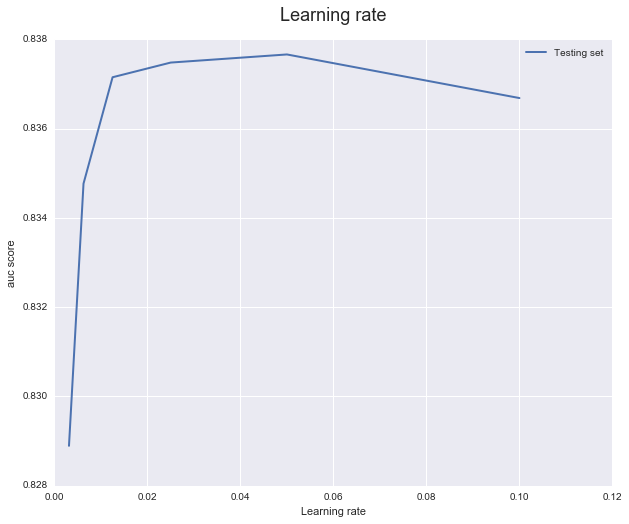

In [30]:
# fine tune the learning rate
print ("Fine tuning learning rate")
# search for the optimal value
learn_rate = [0.1,0.05,0.025,0.0125,0.00625,0.003125]
test_score = np.zeros(len(learn_rate))
# Create different models
for i, s in enumerate(learn_rate):
    start = time.time()
    print ("learn_rate: {:.3f}".format(s))
    # Setup a classifer
    # increase n_estimators 
    clf = ensemble.GradientBoostingClassifier(learning_rate=s,
                                              n_estimators = 150*(i+1),
                                              max_features = 18, 
                                              max_depth= 3, 
                                              subsample = 0.95,
                                              min_samples_leaf=5,
                                              min_samples_split=10,
                                             random_state = 42)                
    # use 4-fold CV
    scores = cross_validation.cross_val_score(clf, X_train2, y_train2, 
                                              scoring='roc_auc', cv=4)
    test_score[i] = scores.mean() # report the mean        
    end = time.time()
    print ("Runinng time (secs): {:.3f}".format(end - start))    
    print ("roc_auc: {:.5f}".format(scores.mean())) 

# Visual aesthetics
plt.figure(figsize=(10,8))
plt.plot(learn_rate, test_score, lw = 2, label = 'Testing set')
plt.legend()
plt.title('Learning rate', fontsize=18, y=1.03)
plt.xlabel('Learning rate')
plt.ylabel('auc score')

## 6. Verficiation
Study the learning curve (classifer performance using the trainig set and test set) of the classifier using different numbers of data 

In [31]:
# choose performance metric
def performance_metric(y_true, y_pred):
    """ Calculates and returns the total score between true and predicted values
        based on a performance metric chosen by the student. """
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred[:,1])
    score = metrics.auc(fpr, tpr)
    return score

In [32]:
# learning rate
def learning_curves(X, y,clf):
    """ plot the learning curve for the train and testing data set. """
    print ("Creating learning curve")
    # Create the figure 
    plt.figure(figsize=(10,8))
    # We will vary the training set size
    sizes = [1000,5000,10000,20000,30000,40000,50000,60000,76020]
    train_score = np.zeros(len(sizes)) # score of the training set
    test_score = np.zeros(len(sizes)) # score of the test set
    # Create different models
    for i, s in enumerate(sizes):
            print(s)    
            # Find the performance on the training set
            # use 4-fold CV
            scores = cross_validation.cross_val_score(clf, X[:s], y[:s],
                                                      scoring='roc_auc', cv=4)
            test_score[i] = scores.mean()    
            print ("test roc_auc: {:.5f}".format(test_score[i])) 

            # Find the performance on the testing set
            # use all the training data
            clf.fit(X[:s], y[:s])
            y_pred = clf.predict_proba(X[:s])
            train_score[i] = performance_metric(y[:s], y_pred)
            print ("train roc_auc: {:.5f}".format(train_score[i]))

    # Visual aesthetics
    plt.figure(figsize=(10,8))
    plt.plot(sizes, train_score, lw = 2, label = 'Testing set')
    plt.plot(sizes, test_score, lw = 2, label = 'Testing set')
    plt.legend()
    plt.title('Learning Curve', fontsize=18, y=1.03)
    plt.xlabel('number of samples')
    plt.ylabel('auc score')

Creating learning curve
1000
test roc_auc: 0.78682
train roc_auc: 0.99311
5000
test roc_auc: 0.82273
train roc_auc: 0.93782
10000
test roc_auc: 0.83304
train roc_auc: 0.91052
20000
test roc_auc: 0.82232
train roc_auc: 0.87572
30000
test roc_auc: 0.82790
train roc_auc: 0.86489
40000
test roc_auc: 0.83157
train roc_auc: 0.86335
50000
test roc_auc: 0.83180
train roc_auc: 0.86070
60000
test roc_auc: 0.83735
train roc_auc: 0.86052
76020
test roc_auc: 0.83766
train roc_auc: 0.85695


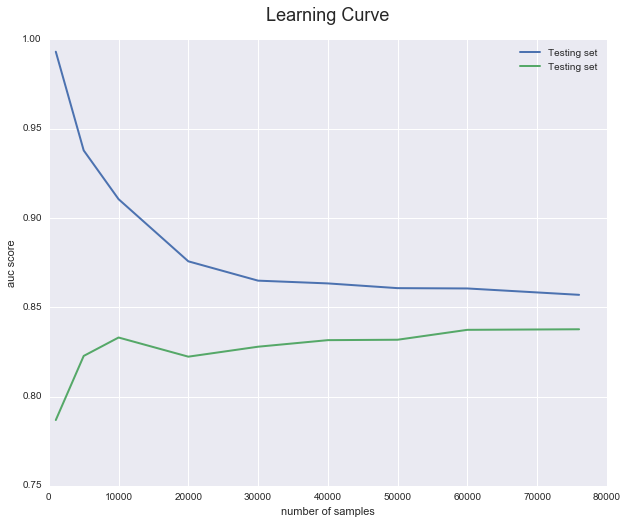

In [33]:
clf = ensemble.GradientBoostingClassifier(learning_rate=0.05,
                                          n_estimators = 300,
                                          max_features = 18,
                                          subsample = 0.95,
                                          max_depth= 3,                                           
                                          min_samples_leaf=5,
                                          min_samples_split=10,
                                         random_state = 42)
learning_curves(X_train2, y_train2,clf)

## 7. Predict the Test Set
predict the test set and make submission file

In [34]:
# final classifier
clf = ensemble.GradientBoostingClassifier(learning_rate=0.05,
                                          n_estimators = 150,
                                          max_features = 18,
                                          subsample = 0.95,
                                          max_depth= 3,                                           
                                          min_samples_leaf=5,
                                          min_samples_split=10,
                                          random_state = 42)
clf.fit(X_train2, y_train2) # fit the data
print("Fitting done")
y_pred = clf.predict_proba(X_test2)
submission = pandas.DataFrame({"ID":id_test, "TARGET":y_pred[:,1]})
submission.to_csv("submission_f.csv", index=False)
print("Prediction done")

Fitting done
Prediction done
